<a href="https://colab.research.google.com/github/Shilpa-PJ/AI-and-Robotics-Nilgiri/blob/main/number_plate_detecrion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install easyocr
!pip install imutils

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

##1. read in image, grayscale and blur


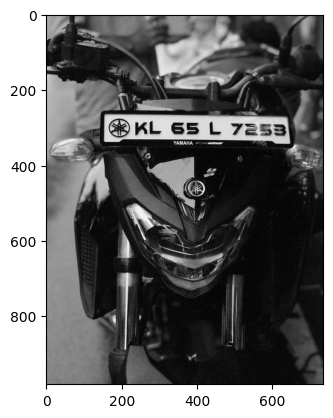

In [33]:
img = cv2.imread('/content/drive/MyDrive/Personalized _ Corporate Gifts Store in Kerala.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting color image to grayscale using cvtColor()
plt.imshow(gray, cmap='gray')#matplotlib's plt.imshow() function to display the grayscale image.
plt.show()


##2. Apply filter and find edges for localization


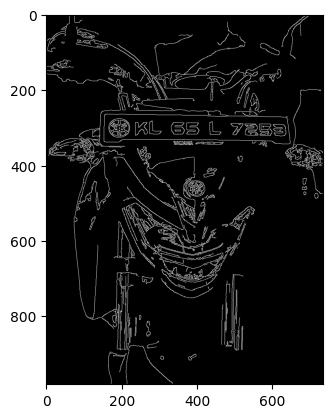

In [34]:
bfilter = cv2.bilateralFilter(gray, 11,17,17)#noise reduction -bilateralFilter - smooth image and find edges
edged = cv2.Canny(bfilter, 30 ,200)#edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

##3. find contours and apply mask

In [35]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)# "cv2.RETR_TREE" parameter specifies the retrieval mode for the contours
contours = imutils.grab_contours(keypoints)#"cv2.CHAIN_APPROX_SIMPLE" specifies the contour approximation method.
contours = sorted(contours,key = cv2.contourArea, reverse = True)[:10]

In [36]:
location = None
for contours in contours:
  approx = cv2.approxPolyDP(contours,10, True)
  if len(approx) == 4:
    location = approx
    break

In [37]:
location

array([[[154, 268]],

       [[157, 339]],

       [[646, 342]],

       [[633, 273]]], dtype=int32)

In [38]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0, 255,-1)
new_image = cv2.bitwise_and(img, img, mask = mask)

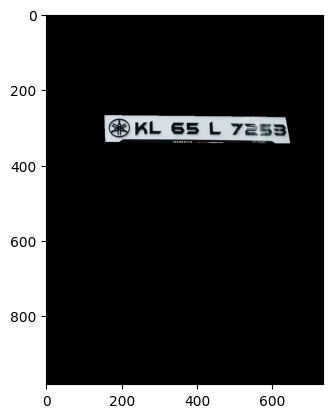

In [39]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [40]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

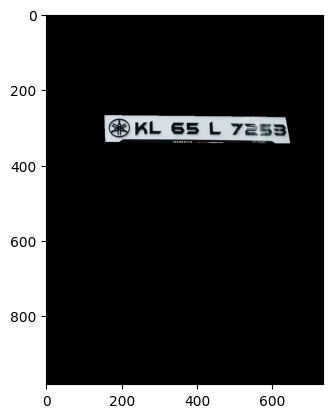

In [41]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

##4. use easyocr to read text


In [42]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[76, 8], [156, 8], [156, 58], [76, 58]], 'KL', 0.9848851721609532),
 ([[173, 13], [255, 13], [255, 57], [173, 57]], '65', 0.9996469119636234),
 ([[273, 13], [313, 13], [313, 57], [273, 57]], 'L', 0.9938380568247709),
 ([[329, 12], [488, 12], [488, 64], [329, 64]], '7253', 0.8109617289977338)]

##5. Render Result

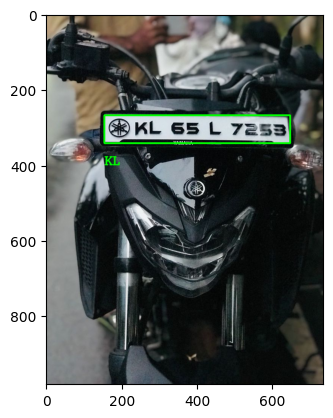

In [43]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale= 1, color = (0,255,0),thickness = 2, lineType = cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
